# Installing Dependencies

In [1]:
! pip install pycaret[full]

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 483.9/483.9 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 27.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 153.4/153.4 kB 10.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 11.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 12.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 80.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 82.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 50.8 MB/s eta

In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [5]:
! pip install kaggle

In [6]:
# check installed version
import pycaret
pycaret.__version__

'3.1.0'

In [8]:
import pandas as pd
from pycaret import classification

In [12]:
! kaggle datasets list

ref                                                        title                                           size  lastUpdated          downloadCount  voteCount  usabilityRating  
---------------------------------------------------------  ---------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/top-spotify-songs-2023                    Most Streamed Spotify Songs 2023                47KB  2023-08-26 11:04:57           6146        200  1.0              
nelgiriyewithana/global-youtube-statistics-2023            Global YouTube Statistics 2023                  60KB  2023-07-28 15:36:38          16713        550  1.0              
joebeachcapital/students-performance                       Students Performance                             2KB  2023-08-31 00:50:11           1795         40  1.0              
devanshinigam/popular-movies-top-250-movies-imdb           Popular Movies (Top 250 movies IMDb)             9K

In [15]:
! kaggle competitions download -c 'titanic'

  0% 0.00/34.1k [00:00<?, ?B/s]
100% 34.1k/34.1k [00:00<00:00, 41.9MB/s]


In [16]:
! mkdir train

# Clustering

In [18]:
# loading sample dataset from pycaret dataset module
from pycaret.datasets import get_data
data = get_data('titanic')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [20]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(data, session_id = 123, use_gpu = True)

,Description,Value
0,Session id,123
1,Original data shape,"(891, 12)"
2,Transformed data shape,"(891, 1730)"
3,Ordinal features,1
4,Numeric features,7
5,Categorical features,5
6,Rows with missing values,79.5%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [21]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [22]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [24]:
# init setup on exp
exp.setup(data, session_id = 123, use_gpu = True)

,Description,Value
0,Session id,123
1,Original data shape,"(891, 12)"
2,Transformed data shape,"(891, 1730)"
3,Ordinal features,1
4,Numeric features,7
5,Categorical features,5
6,Rows with missing values,79.5%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [25]:
# train kmeans model
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4958,2715.8360,0.6328,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [26]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch
kmodes,K-Modes Clustering,kmodes.kmodes.KModes


In [27]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4715,1172.2817,0.6090,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [28]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cluster
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,Cluster 1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C,Cluster 1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,Cluster 1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S,Cluster 1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000000,NaN,S,Cluster 2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000000,B42,S,Cluster 2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450001,NaN,S,Cluster 2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000000,C148,C,Cluster 2


In [29]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

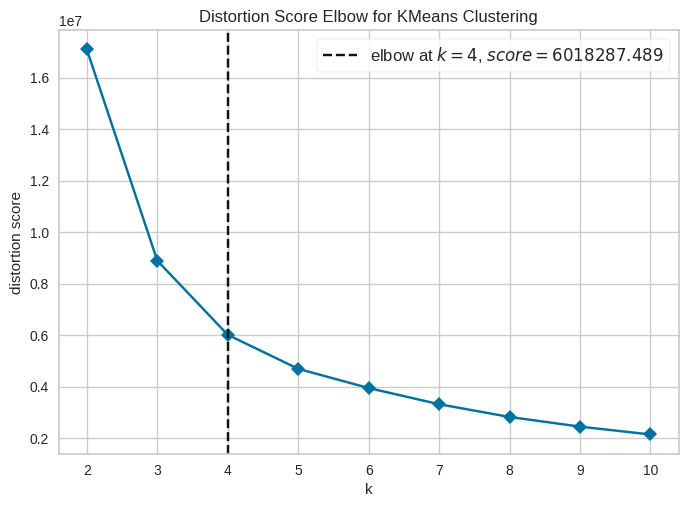

In [30]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

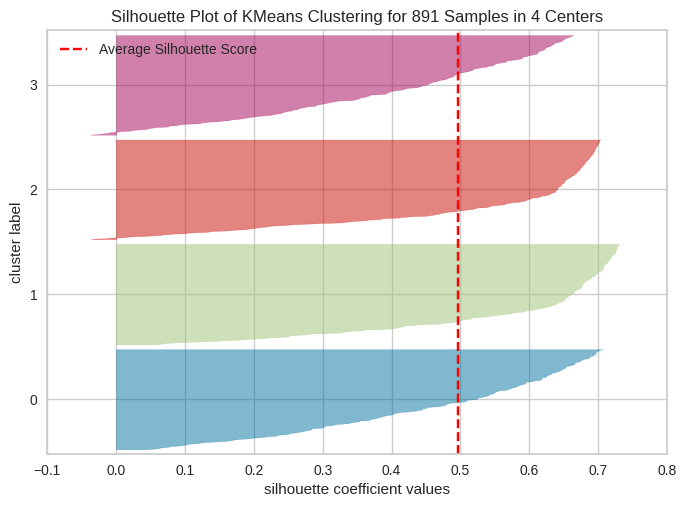

In [31]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [32]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [33]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=data)
kmeans_pred

,PassengerId,Survived,Pclass,"Name_Braund, Mr. Owen Harris","Name_Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Name_Heikkinen, Miss. Laina","Name_Futrelle, Mrs. Jacques Heath (Lily May Peel)","Name_Allen, Mr. William Henry","Name_Moran, Mr. James","Name_McCarthy, Mr. Timothy J",...,Cabin_D28,Cabin_E17,Cabin_A24,Cabin_C50,Cabin_B42,Cabin_C148,Embarked_S,Embarked_C,Embarked_Q,Cluster
0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Cluster 1
1,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Cluster 1
2,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Cluster 1
3,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Cluster 1
4,5.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Cluster 2
887,888.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Cluster 2
888,889.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,Cluster 2
889,890.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,Cluster 2


In [34]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PassengerId', 'Survived',
                                              'Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Name', 'Sex', 'Ticket', 'Cabin',
                                              'Embarked'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encod...
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Sex',
                                                                          'data_type': dtype('O'),
                                                        

In [35]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['PassengerId', 'Survived',
                                             'Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Sex', 'Ticket', 'Cabin',
                                             'Embarked'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('or...
                                                               handle_missing='return_nan',
                                                               mapping=[{'col': 'Sex',
                                                                         'data_type': dtype('O'),
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Name', 'Ticket', 'Cabin',
                                             'Embarked'],
                                    transformer=OneHotEncoder(cols=['Name',
                                                                    'Ticket',
                                                                    'Cabin',
                                                                    'Embarked'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [36]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [37]:
# lets access X_train_transformed
get_config('X_train_transformed')

,PassengerId,Survived,Pclass,"Name_Braund, Mr. Owen Harris","Name_Cumings, Mrs. John Bradley (Florence Briggs Thayer)","Name_Heikkinen, Miss. Laina","Name_Futrelle, Mrs. Jacques Heath (Lily May Peel)","Name_Allen, Mr. William Henry","Name_Moran, Mr. James","Name_McCarthy, Mr. Timothy J",...,Cabin_C47,Cabin_D28,Cabin_E17,Cabin_A24,Cabin_C50,Cabin_B42,Cabin_C148,Embarked_S,Embarked_C,Embarked_Q
0,1.0,0.0,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3.0,1.0,3.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,4.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,5.0,0.0,3.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
887,888.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0
888,889.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
889,890.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0


In [38]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [39]:
# init setup with normalize = True

s = setup(data, session_id = 123,
          normalize = True, normalize_method = 'minmax', use_gpu = True)

,Description,Value
0,Session id,123
1,Original data shape,"(891, 12)"
2,Transformed data shape,"(891, 1730)"
3,Ordinal features,1
4,Numeric features,7
5,Categorical features,5
6,Rows with missing values,79.5%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


<Axes: >

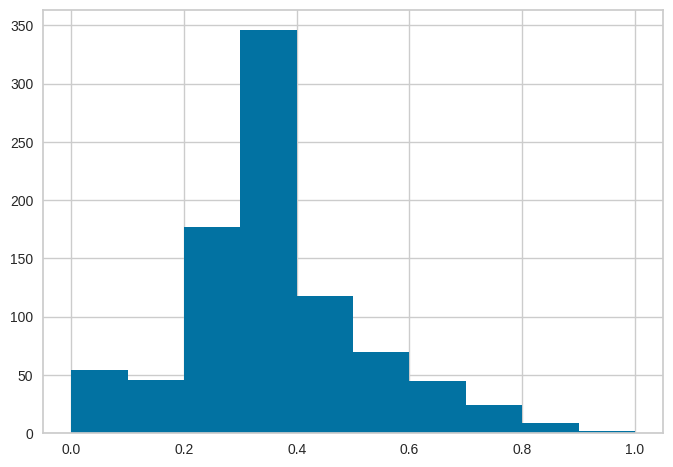

In [40]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['Age'].hist()

<Axes: >

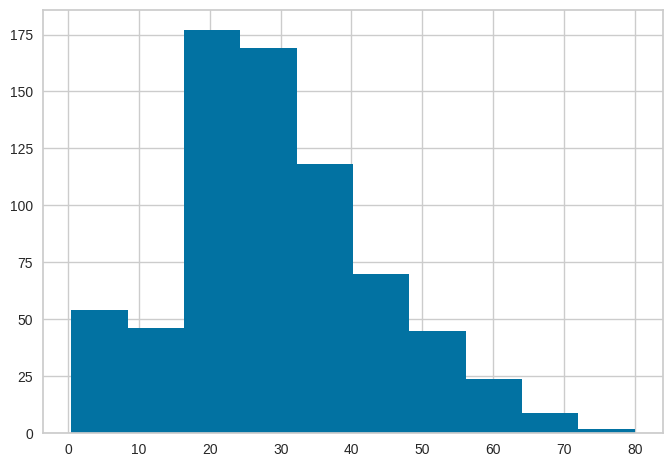

In [41]:
get_config('X_train')['Age'].hist()

In [42]:
kmeans_results = pull()
print(type(kmeans_results))
kmeans_results

<class 'pandas.core.frame.DataFrame'>


,Description,Value
0,Session id,123
1,Original data shape,"(891, 12)"
2,Transformed data shape,"(891, 1730)"
3,Ordinal features,1
4,Numeric features,7
5,Categorical features,5
6,Rows with missing values,79.5%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean


In [43]:
# train kmeans with 10 clusters
create_model('kmeans', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.0847,41.3734,2.7093,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=10, random_state=123)

In [44]:
assign_model(kmeans)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Cluster
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.250000,NaN,S,Cluster 1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.283302,C85,C,Cluster 1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.925000,NaN,S,Cluster 1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.099998,C123,S,Cluster 1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.050000,NaN,S,Cluster 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.000000,NaN,S,Cluster 2
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.000000,B42,S,Cluster 2
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.450001,NaN,S,Cluster 2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.000000,C148,C,Cluster 2


In [45]:
# save model
save_model(kmeans, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['PassengerId', 'Survived',
                                              'Pclass', 'Age', 'SibSp', 'Parch',
                                              'Fare'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Name', 'Sex', 'Ticket', 'Cabin',
                                              'Embarked'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encod...
                                                                          'mapping': female    0
 male      1
 NaN      -1
 dtype: int64}]))),
                 ('onehot_encoding',
                  TransformerWrapper(include=['Name', 'Ticket', 'Cabin',
                                              'Embarked'],
                        

In [46]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['PassengerId', 'Survived',
                                             'Pclass', 'Age', 'SibSp', 'Parch',
                                             'Fare'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=['Name', 'Sex', 'Ticket', 'Cabin',
                                             'Embarked'],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('or...
                                                                         'mapping': female    0
male      1
NaN      -1
dtype: int64}]))),
                ('onehot_encoding',
                 TransformerWrapper(include=['Name', 'Ticket', 'Cabin',
                                             'Embarked'],
                                    transformer=OneHotEncoder(cols=['Name',
                                                                    'Ticket',
                                                                    'Cabin',
                                                                    'Embarked'],
                                                              handle_missing='return_nan',
                                                              use_cat_names=True))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [47]:
# save experiment
save_experiment('my_experiment')

In [48]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=data)

,Description,Value
0,Session id,123
1,Original data shape,"(891, 12)"
2,Transformed data shape,"(891, 1730)"
3,Ordinal features,1
4,Numeric features,7
5,Categorical features,5
6,Rows with missing values,79.5%
7,Preprocess,True
8,Imputation type,simple
9,Numeric imputation,mean
